# Introduction:

In [2]:
#******************************************
# NAME: Jonah Zembower
# Date: March 9, 2025
# Project: EY 2025 Data Science Challenge
#******************************************

This notebook utilizes the NYC planimetric database that is found in the New York Open Data source. There are many different types of data that will be explored from here. 

# Importing Libraries and Data:

### Libraries:

In [3]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For the geodataframe
import geopandas as gpd
from shapely import wkt
from shapely.ops import nearest_points


### Data:

In [4]:
# Import the data
shoreline = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Shoreline_20250309.csv")
boardwalk = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Boardwalk_20250309.csv")
hydrography = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Hydrography_20250309.csv")
parks = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Open_Space__Parks__20250309.csv")
parking_lots = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Parking_Lot_20250309.csv")
elevation = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Elevation_Points_20250301.csv")
pavement = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Pavement_Edge_20250309.csv")
railroad = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Railroad_Line_20250309.csv")
roadbed = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Roadbed_20250309.csv")
sidewalk = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Sidewalk_20250309.csv")
curbs = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\NYC_Planimetric_Database__Curbs_20250309.csv")

In [65]:
# Load the data for elevation points that is cleaned
all_elevation_nyc = pd.read_csv("C:\\Users\\jrzem\OneDrive\\Desktop\\EY Dataset\\Elevation\\all_elevation_nyc.csv")

### Data Region:

In [5]:
# The region that is boudning the city into the bronx and manhattan locations
lower_left = (40.75, -74.01)
upper_right = (40.88, -73.86)
# bounds = (min_lon, min_lat, max_lon, max_lat)
bounds = (lower_left[1], lower_left[0], upper_right[1], upper_right[0])

# Define the bounding box
min_lat, min_lon = lower_left
max_lat, max_lon = upper_right

In [6]:
# Convert the_geom to a GeoDataFrame
shoreline['geometry'] = shoreline['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(shoreline, geometry='geometry')

# Filter the shoreline data points within the bounding box
filtered_shoreline = shoreline[
    (shoreline['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (shoreline['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_shoreline

the_geom    SOURCE_ID  SUB_CODE  \
35   MULTILINESTRING ((-73.87255325549617 40.780827...  10390000026    390000   
56   MULTILINESTRING ((-73.87073923299542 40.779737...  10390000025    390000   
61   MULTILINESTRING ((-73.92718558293264 40.791932...  13390000021    390000   
62   MULTILINESTRING ((-73.94965293833081 40.767535...  12390000012    390000   
88   MULTILINESTRING ((-73.92730531666427 40.791744...  13390000020    390000   
..                                                 ...          ...       ...   
401  MULTILINESTRING ((-73.88511364819935 40.779516...  10390000019    390000   
403  MULTILINESTRING ((-73.9018576365961 40.7813593...  10390000006    390000   
406  MULTILINESTRING ((-73.88500441965328 40.779576...  10390000017    390000   
407  MULTILINESTRING ((-73.90228748822105 40.780208...  10390000024    390000   
408  MULTILINESTRING ((-73.88779777774792 40.773713...  10390000021    390000   

     FEAT_CODE     STATUS   SHAPE_Leng  \
35        3900    Updated  7308.466279   
56        3900  Unchanged   787.072013   
61        3900  Unchanged    76.506265   
62        3900  Unchanged   394.969195   
88        3900  Unchanged   628.907015   
..         ...        ...          ...   
401       3900  Unchanged   849.666797   
403       3900  Unchanged  6316.619267   
406       3900  Unchanged  1989.431293   
407       3900  Unchanged   453.607756   
408       3900  Unchanged  1928.796472   

                                              geometry  
35   MULTILINESTRING ((-73.87255325549617 40.780827...  
56   MULTILINESTRING ((-73.87073923299542 40.779737...  
61   MULTILINESTRING ((-73.92718558293264 40.791932...  
62   MULTILINESTRING ((-73.94965293833081 40.767535...  
88   MULTILINESTRING ((-73.92730531666427 40.791744...  
..                                                 ...  
401  MULTILINESTRING ((-73.88511364819935 40.779516...  
403  MULTILINESTRING ((-73.9018576365961 40.7813593...  
406  MULTILINESTRING ((-73.88500441965328 40.779576...  
407  MULTILINESTRING ((-73.90228748822105 40.780208...  
408  MULTILINESTRING ((-73.88779777774792 40.773713...  

[73 rows x 7 columns]

In [7]:
# Convert the_geom to a GeoDataFrame
boardwalk['geometry'] = boardwalk['the_geom'].apply(wkt.loads)
gdf_boardwalk = gpd.GeoDataFrame(boardwalk, geometry='geometry')

# Filter the boardwalk data points within the bounding box
filtered_boardwalk = boardwalk[
    (boardwalk['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (boardwalk['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (boardwalk['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (boardwalk['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_boardwalk

the_geom  SUB_CODE  FEAT_CODE  \
17   MULTIPOLYGON (((-73.93386802314728 40.81447421...    430000       4300   
31   MULTIPOLYGON (((-73.92136610929985 40.85414499...    430000       4300   
36   MULTIPOLYGON (((-73.94009510160897 40.77274040...    430000       4300   
37   MULTIPOLYGON (((-73.99481406461148 40.77157077...    430000       4300   
39   MULTIPOLYGON (((-73.94405644029504 40.76694914...    430000       4300   
40   MULTIPOLYGON (((-73.94787759532021 40.76242651...    430000       4300   
42   MULTIPOLYGON (((-73.96215220386028 40.75456254...    430000       4300   
45   MULTIPOLYGON (((-74.00694231907444 40.75473642...    430000       4300   
46   MULTIPOLYGON (((-74.00422210057333 40.75847237...    430000       4300   
48   MULTIPOLYGON (((-74.00048817263736 40.76364110...    430000       4300   
49   MULTIPOLYGON (((-73.9572502865939 40.827091808...    430000       4300   
50   MULTIPOLYGON (((-73.93223796955994 40.86889838...    430000       4300   
51   MULTIPOLYGON (((-73.91492688829368 40.79282807...    430000       4300   
52   MULTIPOLYGON (((-73.98982179057664 40.77818202...    430000       4300   
53   MULTIPOLYGON (((-73.9896850467782 40.778388425...    430000       4300   
54   MULTIPOLYGON (((-73.9894453907753 40.778717179...    430000       4300   
55   MULTIPOLYGON (((-73.98973613090688 40.77838709...    430000       4300   
56   MULTIPOLYGON (((-73.98953265751153 40.77857613...    430000       4300   
57   MULTIPOLYGON (((-73.99126265645428 40.77634957...    430000       4300   
58   MULTIPOLYGON (((-73.99048212633514 40.77737232...    430000       4300   
59   MULTIPOLYGON (((-73.99143675593943 40.77609804...    430000       4300   
60   MULTIPOLYGON (((-73.99179642716817 40.77559348...    430000       4300   
61   MULTIPOLYGON (((-73.9918334158981 40.775586594...    430000       4300   
62   MULTIPOLYGON (((-73.91715194123655 40.79211082...    430000       4300   
63   MULTIPOLYGON (((-73.92198970229072 40.78577523...    430000       4300   
64   MULTIPOLYGON (((-73.91829550322677 40.87315584...    430000       4300   
67   MULTIPOLYGON (((-73.9375022605258 40.774677318...    430000       4300   
68   MULTIPOLYGON (((-73.99212478241779 40.77498277...    430000       4300   
70   MULTIPOLYGON (((-73.99030877014329 40.77754797...    430000       4300   
75   MULTIPOLYGON (((-73.955002312576 40.7549087728...    430000       4300   
76   MULTIPOLYGON (((-73.95838413189044 40.75394860...    430000       4300   
77   MULTIPOLYGON (((-74.00428014183174 40.75839418...    430000       4300   
79   MULTIPOLYGON (((-73.94780448629488 40.76980680...    430000       4300   
81   MULTIPOLYGON (((-73.92378697966065 40.85376936...    430000       4300   
82   MULTIPOLYGON (((-73.95930302612409 40.82080644...    430000       4300   
83   MULTIPOLYGON (((-73.95994943892508 40.82009128...    430000       4300   
84   MULTIPOLYGON (((-73.92905620235268 40.79676715...    430000       4300   
85   MULTIPOLYGON (((-73.92670618496985 40.79871540...    430000       4300   
86   MULTIPOLYGON (((-73.92966025652476 40.79127391...    430000       4300   
88   MULTIPOLYGON (((-73.88146053292618 40.81807303...    430000       4300   
89   MULTIPOLYGON (((-73.88488219150346 40.82520067...    430000       4300   
137  MULTIPOLYGON (((-73.95352616136806 40.75208590...    430000       4300   
138  MULTIPOLYGON (((-73.9275393489551 40.848395265...    430000       4300   

       SOURCE_ID     STATUS    SHAPE_Leng     SHAPE_Area  \
17   13430000019  Unchanged   2508.691324   26101.405037   
31   15430000002    Updated   3386.424568   32867.592334   
36   12430000007  Unchanged  14262.565393   94834.883134   
37   12430000009    Updated   1426.203865   15533.203585   
39   12430000011  Unchanged   5473.519982   27637.089924   
40   12430000013  Unchanged   6325.924861   19791.260158   
42   12430000015  Unchanged   1566.930701   12947.959890   
45   12430000022  Unchanged   1929.423212   11974.284986   
46   12430000024  Unchanged  

In [8]:
# Convert the_geom to a GeoDataFrame
hydrography['geometry'] = hydrography['the_geom'].apply(wkt.loads)
gdf_hydrography = gpd.GeoDataFrame(hydrography, geometry='geometry')

# Filter the hydrography data points within the bounding box
filtered_hydrography = hydrography[
    (hydrography['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (hydrography['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (hydrography['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (hydrography['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_hydrography

the_geom           NAME  \
3     MULTIPOLYGON (((-73.87561672141112 40.85367606...          unset   
16    MULTIPOLYGON (((-73.87839461147047 40.86318426...          unset   
96    MULTIPOLYGON (((-73.88111057332733 40.84869301...          unset   
213   MULTIPOLYGON (((-73.9721184206383 40.768254827...          unset   
221   MULTIPOLYGON (((-73.97405844223354 40.76728907...          unset   
...                                                 ...            ...   
851   MULTIPOLYGON (((-73.9055190233954 40.783558319...          unset   
2179  MULTIPOLYGON (((-73.91245017780322 40.78541593...            NaN   
2194  MULTIPOLYGON (((-73.88505741589849 40.77954043...     BOWERY BAY   
2195  MULTIPOLYGON (((-73.89706014598092 40.78406044...  LUYSTER CREEK   
2200  MULTIPOLYGON (((-73.91143951218265 40.78469795...            NaN   

        SOURCE_ID  FEAT_CODE  SUB_CODE     STATUS    SHAPE_Leng    SHAPE_Area  \
3     15261000088       2610    261000  Unchanged    741.840438  9.360132e+03   
16    15260000136       2600    260000  Unchanged    578.704580  1.152490e+04   
96    15264000016       2640    264000  Unchanged    436.619997  8.365859e+03   
213   12261000007       2610    261000    Updated    577.251612  7.521765e+03   
221   12260000004       2600    260000  Unchanged   3387.027010  1.615777e+05   
...           ...        ...       ...        ...           ...           ...   
851   10261000004       2610    261000  Unchanged    404.650549  1.116801e+04   
2179            0       2610    261000        New    941.598020  7.049725e+04   
2194  10266000003       2660    266000  Unchanged  11145.002417  3.637606e+06   
2195  10266000005       2630    263000  Unchanged   5612.632811  5.594098e+05   
2200            0       2610    261000        New    955.650315  7.261714e+04   

                                               geometry  
3     MULTIPOLYGON (((-73.87561672141112 40.85367606...  
16    MULTIPOLYGON (((-73.87839461147047 40.86318426...  
96    MULTIPOLYGON (((-73.88111057332733 40.84869301...  
213   MULTIPOLYGON (((-73.9721184206383 40.768254827...  
221   MULTIPOLYGON (((-73.97405844223354 40.76728907...  
...                                                 ...  
851   MULTIPOLYGON (((-73.9055190233954 40.783558319...  
2179  MULTIPOLYGON (((-73.91245017780322 40.78541593...  
2194  MULTIPOLYGON (((-73.88505741589849 40.77954043...  
2195  MULTIPOLYGON (((-73.89706014598092 40.78406044...  
2200  MULTIPOLYGON (((-73.91143951218265 40.78469795...  

[72 rows x 9 columns]

In [9]:
# Convert the_geom to a GeoDataFrame
parks['geometry'] = parks['the_geom'].apply(wkt.loads)
gdf_parks = gpd.GeoDataFrame(parks, geometry='geometry')

# Filter the parks data points within the bounding box
filtered_parks = parks[
    (parks['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (parks['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (parks['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (parks['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_parks

the_geom PARK_NAME  FEAT_CODE  \
4      MULTIPOLYGON (((-73.91187444951721 40.76027710...       NaN       4910   
5      MULTIPOLYGON (((-73.91201536654683 40.76034362...       NaN       4910   
6      MULTIPOLYGON (((-73.92236340271138 40.77481547...       NaN       4910   
7      MULTIPOLYGON (((-73.92249953057733 40.77499277...       NaN       4910   
8      MULTIPOLYGON (((-73.92263252622672 40.77516887...       NaN       4910   
...                                                  ...       ...        ...   
13042  MULTIPOLYGON (((-73.89241335341974 40.76353111...       NaN       4910   
13043  MULTIPOLYGON (((-73.9297586561297 40.765731235...       NaN       4910   
13044  MULTIPOLYGON (((-73.92983346489264 40.76559684...       NaN       4910   
13045  MULTIPOLYGON (((-73.90548423117293 40.78034758...       NaN       4985   
13046  MULTIPOLYGON (((-73.9061767518179 40.779775353...       NaN       4985   

       SOURCE_ID  SUB_CODE LANDUSE PARKNUM STATUS SYSTEM  SHAPE_Leng  \
4              0    491060     NaN     NaN    New    NaN  229.482026   
5              0    491060     NaN     NaN    New    NaN  227.955376   
6              0    491060     NaN     NaN    New    NaN  179.457967   
7              0    491060     NaN     NaN    New    NaN  182.577197   
8              0    491060     NaN     NaN    New    NaN  178.784603   
...          ...       ...     ...     ...    ...    ...         ...   
13042          0    491040     NaN     NaN    New    NaN  252.150551   
13043          0    491060     NaN     NaN    New    NaN  229.217441   
13044          0    491020     NaN     NaN    New    NaN  144.117589   
13045          0    498500     NaN     NaN    New    NaN  390.875576   
13046          0    498500     NaN     NaN    New    NaN  572.627436   

        SHAPE_Area                                           geometry  
4      2849.186857  MULTIPOLYGON (((-73.91187444951721 40.76027710...  
5      2816.570656  MULTIPOLYGON (((-73.91201536654683 40.76034362...  
6      1780.100105  MULTIPOLYGON (((-73.92236340271138 40.77481547...  
7      1851.058970  MULTIPOLYGON (((-73.92249953057733 40.77499277...  
8      1778.969182  MULTIPOLYGON (((-73.92263252622672 40.77516887...  
...            ...                                                ...  
13042  3546.464684  MULTIPOLYGON (((-73.89241335341974 40.76353111...  
13043  2862.137037  MULTIPOLYGON (((-73.9297586561297 40.765731235...  
13044  1175.478475  MULTIPOLYGON (((-73.92983346489264 40.76559684...  
13045  4881.612378  MULTIPOLYGON (((-73.90548423117293 40.78034758...  
13046  7622.579464  MULTIPOLYGON (((-73.9061767518179 40.779775353...  

[3114 rows x 12 columns]

In [10]:
# Convert the_geom to a GeoDataFrame
parking_lots['geometry'] = parking_lots['the_geom'].apply(wkt.loads)
gdf_parking_lots = gpd.GeoDataFrame(parking_lots, geometry='geometry')

# Filter the parking lots data points within the bounding box
filtered_parking_lots = parking_lots[
    (parking_lots['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (parking_lots['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (parking_lots['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (parking_lots['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_parking_lots

the_geom    SOURCE_ID  \
8      MULTIPOLYGON (((-73.93536756152407 40.80231377...  13500000715   
10     MULTIPOLYGON (((-73.88879146251598 40.81429355...            0   
11     MULTIPOLYGON (((-73.88530102587569 40.87623465...  15500000758   
2131   MULTIPOLYGON (((-73.86179481256293 40.75669634...   9500000710   
2132   MULTIPOLYGON (((-73.87084321117196 40.76517791...  10500000243   
...                                                  ...          ...   
20267  MULTIPOLYGON (((-73.94769938743892 40.75160035...  10500000410   
20272  MULTIPOLYGON (((-73.93900223742841 40.75148832...  10500001618   
20273  MULTIPOLYGON (((-73.93754273829421 40.75751531...  10500000170   
20294  MULTIPOLYGON (((-73.94106318163783 40.76087208...  10500000868   
20299  MULTIPOLYGON (((-73.91225864514175 40.75049696...  10500001722   

       FEAT_CODE  SUB_CODE     STATUS   SHAPE_Leng    SHAPE_Area  \
8           5000    500000  Unchanged   336.604032   3055.208548   
10          5000    500000        New   605.722191  22867.052501   
11          5000    500000  Unchanged   276.754880   3525.744730   
2131        5000    500000  Unchanged   286.508807   3617.244697   
2132        5000    500000  Unchanged   414.125608   5771.332122   
...          ...       ...        ...          ...           ...   
20267       5000    500000    Updated   569.985935  14403.626179   
20272       5000    500000    Updated   481.100231   5398.700112   
20273       5000    500000    Updated   423.218106   9732.377247   
20294       5000    500000    Updated   319.204474   3534.916413   
20299       5000    500000    Updated  1491.330917  63352.181212   

                                                geometry  
8      MULTIPOLYGON (((-73.93536756152407 40.80231377...  
10     MULTIPOLYGON (((-73.88879146251598 40.81429355...  
11     MULTIPOLYGON (((-73.88530102587569 40.87623465...  
2131   MULTIPOLYGON (((-73.86179481256293 40.75669634...  
2132   MULTIPOLYGON (((-73.87084321117196 40.76517791...  
...                                                  ...  
20267  MULTIPOLYGON (((-73.94769938743892 40.75160035...  
20272  MULTIPOLYGON (((-73.93900223742841 40.75148832...  
20273  MULTIPOLYGON (((-73.93754273829421 40.75751531...  
20294  MULTIPOLYGON (((-73.94106318163783 40.76087208...  
20299  MULTIPOLYGON (((-73.91225864514175 40.75049696...  

[4031 rows x 8 columns]

In [11]:
# Convert the_geom to a GeoDataFrame
elevation['geometry'] = elevation['the_geom'].apply(wkt.loads)
gdf_elevation = gpd.GeoDataFrame(elevation, geometry='geometry')

# Filter the elevation data points within the bounding box
filtered_elevation = elevation[
    (elevation['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (elevation['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (elevation['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (elevation['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_elevation

# Convert the elevation_2['Elevation'] column to meters instead of feet
filtered_elevation['ELEVATION'] = filtered_elevation['ELEVATION'] * 0.328084

In [12]:
# Convert the_geom to a GeoDataFrame
pavement['geometry'] = pavement['the_geom'].apply(wkt.loads)
gdf_pavement = gpd.GeoDataFrame(pavement, geometry='geometry')

# Filter the pavement data points within the bounding box
filtered_pavement = pavement[
    (pavement['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (pavement['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (pavement['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (pavement['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_pavement

the_geom    SOURCE_ID  \
14656   MULTILINESTRING ((-73.86545840220167 40.757650...  11226009054   
18968   MULTILINESTRING ((-73.86401391078725 40.765823...  11227009678   
18983   MULTILINESTRING ((-73.86997561498237 40.765844...  11226005857   
19020   MULTILINESTRING ((-73.86631788999367 40.766986...  11226009174   
19048   MULTILINESTRING ((-73.86912007436561 40.763444...  11227000150   
...                                                   ...          ...   
176895  MULTILINESTRING ((-73.9176990295009 40.7647119...  10227009374   
176897  MULTILINESTRING ((-73.9081417173333 40.7532614...  10226002811   
178916  MULTILINESTRING ((-73.92577254288551 40.845472...  13226000470   
178925  MULTILINESTRING ((-73.86383932078404 40.767727...            0   
178945  MULTILINESTRING ((-73.93202042717742 40.830832...  13226007624   

        FEAT_CODE  SUB_CODE     STATUS   BLOCKF_ID  CONFLATED   SHAPE_Leng  \
14656        2260    226000  Unchanged   112269054          0    53.303666   
18968        2270    227000  Unchanged   112279678          1   115.724190   
18983        2260    226000  Unchanged   112265857          1   402.873242   
19020        2260    226000  Unchanged   112269174          0   216.321770   
19048        2270    227000  Unchanged   112270150          0   230.738831   
...           ...       ...        ...         ...        ...          ...   
176895       2270    227000    Updated   102279374          1   109.206644   
176897       2260    226000    Updated   102262811          1   128.554493   
178916       2260    226000    Updated  1322600470          1  2693.280473   
178925       2260    226000        New           0          1   318.479153   
178945       2260    226000    Updated  1322607624          1   564.043472   

                                                 geometry  
14656   MULTILINESTRING ((-73.86545840220167 40.757650...  
18968   MULTILINESTRING ((-73.86401391078725 40.765823...  
18983   MULTILINESTRING ((-73.86997561498237 40.765844...  
19020   MULTILINESTRING ((-73.86631788999367 40.766986...  
19048   MULTILINESTRING ((-73.86912007436561 40.763444...  
...                                                   ...  
176895  MULTILINESTRING ((-73.9176990295009 40.7647119...  
176897  MULTILINESTRING ((-73.9081417173333 40.7532614...  
178916  MULTILINESTRING ((-73.92577254288551 40.845472...  
178925  MULTILINESTRING ((-73.86383932078404 40.767727...  
178945  MULTILINESTRING ((-73.93202042717742 40.830832...  

[28995 rows x 9 columns]

In [13]:
# Convert the_geom to a GeoDataFrame
railroad['geometry'] = railroad['the_geom'].apply(wkt.loads)
gdf_railroad = gpd.GeoDataFrame(railroad, geometry='geometry')

# Filter the railroad data points within the bounding box
filtered_railroad = railroad[
    (railroad['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (railroad['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (railroad['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (railroad['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_railroad

the_geom    SOURCE_ID  \
1166   MULTILINESTRING ((-73.93497990320523 40.821825...  13240000543   
1167   MULTILINESTRING ((-73.91468611932383 40.864807...  13240000195   
1168   MULTILINESTRING ((-74.00281777752043 40.754923...  12240000217   
1169   MULTILINESTRING ((-73.92034590685226 40.853604...  13240000576   
1170   MULTILINESTRING ((-73.91626289641226 40.865889...  13240000184   
...                                                  ...          ...   
14382  MULTILINESTRING ((-73.93128244629025 40.750940...            0   
14385  MULTILINESTRING ((-73.92989007561998 40.751420...            0   
14387  MULTILINESTRING ((-73.93128517525882 40.750945...            0   
14389  MULTILINESTRING ((-73.93062536718261 40.751167...            0   
14391  MULTILINESTRING ((-73.93123217360787 40.750848...            0   

       FEAT_CODE  SUB_CODE                       NAME     STATUS  SHAPE_Leng  \
1166        2400    240000                    NO NAME  Unchanged  257.809613   
1167        2400    240000                    NO NAME  Unchanged  758.718722   
1168        2440    244000                     AMTRAK  Unchanged  697.325592   
1169        2400    240010  METRO-NORTH COMMUTER HUDS  Unchanged   61.405075   
1170        2400    240000                    NO NAME  Unchanged  361.412385   
...          ...       ...                        ...        ...         ...   
14382       2400    240000                        NaN        New  505.189824   
14385       2400    240000                        NaN        New  425.341855   
14387       2400    240000                        NaN        New   23.215053   
14389       2400    240000                        NaN        New  200.374370   
14391       2400    240000                        NaN        New  217.273948   

                                                geometry  
1166   MULTILINESTRING ((-73.93497990320523 40.821825...  
1167   MULTILINESTRING ((-73.91468611932383 40.864807...  
1168   MULTILINESTRING ((-74.00281777752043 40.754923...  
1169   MULTILINESTRING ((-73.92034590685226 40.853604...  
1170   MULTILINESTRING ((-73.91626289641226 40.865889...  
...                                                  ...  
14382  MULTILINESTRING ((-73.93128244629025 40.750940...  
14385  MULTILINESTRING ((-73.92989007561998 40.751420...  
14387  MULTILINESTRING ((-73.93128517525882 40.750945...  
14389  MULTILINESTRING ((-73.93062536718261 40.751167...  
14391  MULTILINESTRING ((-73.93123217360787 40.750848...  

[3416 rows x 8 columns]

In [14]:
# Convert the_geom to a GeoDataFrame
roadbed['geometry'] = roadbed['the_geom'].apply(wkt.loads)
gdf_roadbed = gpd.GeoDataFrame(roadbed, geometry='geometry')

# Filter the roadbed data points within the bounding box
filtered_roadbed = roadbed[
    (roadbed['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (roadbed['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (roadbed['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (roadbed['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_roadbed

the_geom    SOURCE_ID  \
18      MULTIPOLYGON (((-73.89960288901014 40.75641616...  10350004522   
19      MULTIPOLYGON (((-73.94433790035632 40.75259328...  10350001565   
20      MULTIPOLYGON (((-73.94433790035632 40.75259328...  10350001565   
21      MULTIPOLYGON (((-73.94491704607788 40.75252184...  10350001565   
25      MULTIPOLYGON (((-73.88982310732054 40.83403088...  14350001239   
...                                                   ...          ...   
104941  MULTIPOLYGON (((-73.93187917360252 40.83096897...  14350004450   
104942  MULTIPOLYGON (((-73.9284532592959 40.840247622...  14350004450   
104944  MULTIPOLYGON (((-73.92731694607149 40.84308629...  13350003629   
104945  MULTIPOLYGON (((-73.92891508214844 40.84180887...  14350004428   
104949  MULTIPOLYGON (((-73.9288215459468 40.840221125...  13350004109   

        SUB_CODE  FEAT_CODE     STATUS    SHAPE_Leng     SHAPE_Area  \
18        350020       3500    Updated     77.836406      50.013940   
19        350000       3500    Updated    101.342286     126.443869   
20        350000       3500    Updated    194.497485    1210.823939   
21        350000       3500    Updated    202.836215    1648.111708   
25        350000       3500  Unchanged   1264.544446    9007.460097   
...          ...        ...        ...           ...            ...   
104941    350000       3500  Unchanged   2760.735291   30093.141944   
104942    350000       3500  Unchanged   6773.538970   97905.709524   
104944    350000       3500  Unchanged   1594.344601   16663.083869   
104945    350000       3500  Unchanged  14089.393618  142134.092431   
104949    350000       3500    Updated  13686.140322  152041.711439   

                                                 geometry  
18      MULTIPOLYGON (((-73.89960288901014 40.75641616...  
19      MULTIPOLYGON (((-73.94433790035632 40.75259328...  
20      MULTIPOLYGON (((-73.94433790035632 40.75259328...  
21      MULTIPOLYGON (((-73.94491704607788 40.75252184...  
25      MULTIPOLYGON (((-73.88982310732054 40.83403088...  
...                                                   ...  
104941  MULTIPOLYGON (((-73.93187917360252 40.83096897...  
104942  MULTIPOLYGON (((-73.9284532592959 40.840247622...  
104944  MULTIPOLYGON (((-73.92731694607149 40.84308629...  
104945  MULTIPOLYGON (((-73.92891508214844 40.84180887...  
104949  MULTIPOLYGON (((-73.9288215459468 40.840221125...  

[18502 rows x 8 columns]

In [15]:
# Convert the_geom to a GeoDataFrame
sidewalk['geometry'] = sidewalk['the_geom'].apply(wkt.loads)
gdf_sidewalk = gpd.GeoDataFrame(sidewalk, geometry='geometry')

# Filter the sidewalk data points within the bounding box
filtered_sidewalk = sidewalk[
    (sidewalk['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (sidewalk['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (sidewalk['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (sidewalk['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_sidewalk

the_geom    SOURCE_ID  \
33     MULTIPOLYGON (((-73.92060737186519 40.75310787...  10380000429   
34     MULTIPOLYGON (((-73.94268861159811 40.76212534...  10380001261   
36     MULTIPOLYGON (((-73.94907533300145 40.75435578...  10380001305   
37     MULTIPOLYGON (((-73.94071911778559 40.75063044...  10380000948   
38     MULTIPOLYGON (((-73.91137302792129 40.76117686...            0   
...                                                  ...          ...   
50844  MULTIPOLYGON (((-73.92494158590605 40.80655486...  13380001242   
50848  MULTIPOLYGON (((-73.86810864695329 40.82755199...  14380000443   
50849  MULTIPOLYGON (((-73.9158447550898 40.839448908...  14380001113   
50850  MULTIPOLYGON (((-73.86830069649811 40.82835539...  14380000443   
50861  MULTIPOLYGON (((-73.90884025556674 40.83014142...  14380004644   

       SUB_CODE  FEAT_CODE     STATUS   SHAPE_Leng    SHAPE_Area  \
33       380000       3800    Updated  1756.360017  11044.813984   
34       380000       3800    Updated   949.587090   3079.519124   
36       380000       3800    Updated   505.356522   3758.045871   
37       380000       3800    Updated  1282.526069   8141.779868   
38       380010       3800        New   602.283130   4450.861762   
...         ...        ...        ...          ...           ...   
50844    380000       3800  Unchanged   436.076629   1708.785491   
50848    380000       3800    Updated  1481.846126   9823.013644   
50849    380000       3800    Updated  3080.409459  20963.476298   
50850    380000       3800    Updated   353.501340   2728.774751   
50861    380000       3800    Updated  2289.607368  13069.192524   

                                                geometry  
33     MULTIPOLYGON (((-73.92060737186519 40.75310787...  
34     MULTIPOLYGON (((-73.94268861159811 40.76212534...  
36     MULTIPOLYGON (((-73.94907533300145 40.75435578...  
37     MULTIPOLYGON (((-73.94071911778559 40.75063044...  
38     MULTIPOLYGON (((-73.91137302792129 40.76117686...  
...                                                  ...  
50844  MULTIPOLYGON (((-73.92494158590605 40.80655486...  
50848  MULTIPOLYGON (((-73.86810864695329 40.82755199...  
50849  MULTIPOLYGON (((-73.9158447550898 40.839448908...  
50850  MULTIPOLYGON (((-73.86830069649811 40.82835539...  
50861  MULTIPOLYGON (((-73.90884025556674 40.83014142...  

[8704 rows x 8 columns]

In [16]:
# Convert the_geom to a GeoDataFrame
curbs['geometry'] = curbs['the_geom'].apply(wkt.loads)
gdf_curbs = gpd.GeoDataFrame(curbs, geometry='geometry')

# Filter the curbs data points within the bounding box
filtered_curbs = curbs[
    (curbs['geometry'].apply(lambda geom: geom.bounds[1]) >= min_lat) &
    (curbs['geometry'].apply(lambda geom: geom.bounds[3]) <= max_lat) &
    (curbs['geometry'].apply(lambda geom: geom.bounds[0]) >= min_lon) &
    (curbs['geometry'].apply(lambda geom: geom.bounds[2]) <= max_lon)
]

# Display the filtered data
filtered_curbs

the_geom    SOURCE_ID  \
3823    MULTILINESTRING ((-73.91895210238549 40.789762...  13225002509   
3844    MULTILINESTRING ((-73.93516462770039 40.811678...  13225008205   
3889    MULTILINESTRING ((-74.00620071610547 40.753504...  12225005053   
3914    MULTILINESTRING ((-73.93693716375705 40.808250...  13225010576   
3934    MULTILINESTRING ((-73.92089800962542 40.853308...  13225010783   
...                                                   ...          ...   
217164  MULTILINESTRING ((-73.88290875214318 40.866543...  15225000206   
217183  MULTILINESTRING ((-73.93586709977454 40.835089...            0   
217184  MULTILINESTRING ((-73.93465800474631 40.836138...            0   
217186  MULTILINESTRING ((-73.93465800474631 40.836138...            0   
217661  MULTILINESTRING ((-73.8886167182749 40.8246894...            0   

        FEAT_CODE  SUB_CODE     STATUS   SHAPE_Leng  \
3823         2250    225000    Updated    19.607258   
3844         2250    225000  Unchanged   235.651635   
3889         2250    225000  Unchanged    46.883892   
3914         2250    225000  Unchanged     2.290515   
3934         2250    225000  Unchanged    25.764695   
...           ...       ...        ...          ...   
217164       2250    225000  Unchanged   134.371032   
217183       2250    225000        New   509.539829   
217184       2250    225000        New   107.385631   
217186       2250    225000        New  1285.664888   
217661       2250    225000        New    18.065675   

                                                 geometry  
3823    MULTILINESTRING ((-73.91895210238549 40.789762...  
3844    MULTILINESTRING ((-73.93516462770039 40.811678...  
3889    MULTILINESTRING ((-74.00620071610547 40.753504...  
3914    MULTILINESTRING ((-73.93693716375705 40.808250...  
3934    MULTILINESTRING ((-73.92089800962542 40.853308...  
...                                                   ...  
217164  MULTILINESTRING ((-73.88290875214318 40.866543...  
217183  MULTILINESTRING ((-73.93586709977454 40.835089...  
217184  MULTILINESTRING ((-73.93465800474631 40.836138...  
217186  MULTILINESTRING ((-73.93465800474631 40.836138...  
217661  MULTILINESTRING ((-73.8886167182749 40.8246894...  

[41729 rows x 7 columns]

# EDA:

### Curbs, Pavement, Sidewalks, Roadbed, Railroads:

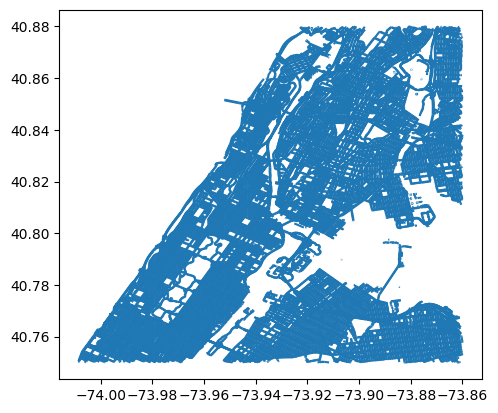

In [17]:
# Convert the_geom to a GeoDataFrame
filtered_curbs['geometry'] = filtered_curbs['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_curbs, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

- FEAT_CODE = 2260 is road edge
- FEAT_CODE = 2230 is Airport Runway
- FEAT_CODE = 2270 is Alley

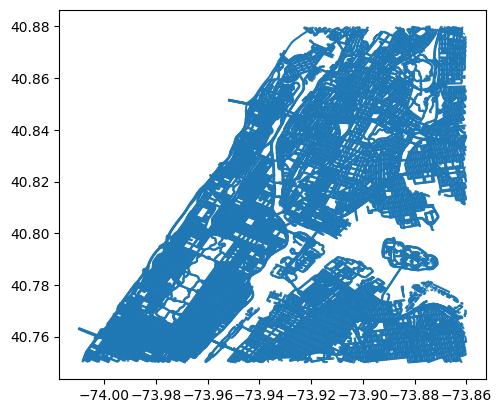

In [18]:
# Convert the_geom to a GeoDataFrame
filtered_pavement['geometry'] = filtered_pavement['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_pavement, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Road Edge:

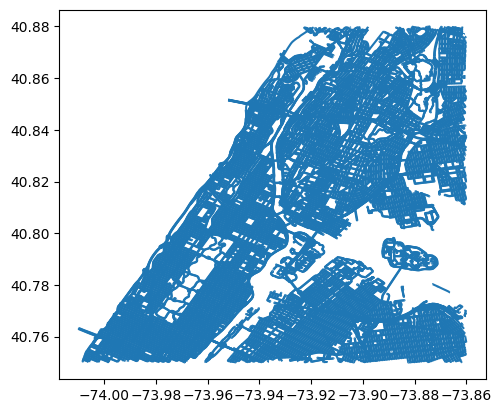

In [19]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_pavement_road = filtered_pavement[filtered_pavement['FEAT_CODE'] == 2260]
# Convert the_geom to a GeoDataFrame
filtered_pavement_road['geometry'] = filtered_pavement_road['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_pavement_road, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Airport Runway:

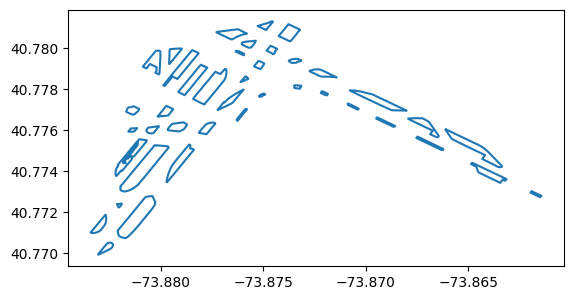

In [20]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_pavement_airport = filtered_pavement[filtered_pavement['FEAT_CODE'] == 2230]
# Convert the_geom to a GeoDataFrame
filtered_pavement_airport['geometry'] = filtered_pavement_airport['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_pavement_airport, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Alley:

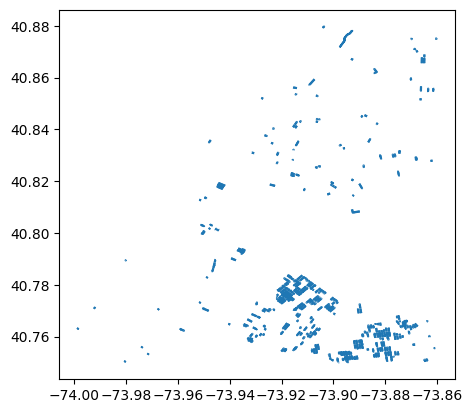

In [21]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_pavement_alley = filtered_pavement[filtered_pavement['FEAT_CODE'] == 2270]
# Convert the_geom to a GeoDataFrame
filtered_pavement_alley['geometry'] = filtered_pavement_alley['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_pavement_alley, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

In [22]:
filtered_sidewalk

the_geom    SOURCE_ID  \
33     MULTIPOLYGON (((-73.92060737186519 40.75310787...  10380000429   
34     MULTIPOLYGON (((-73.94268861159811 40.76212534...  10380001261   
36     MULTIPOLYGON (((-73.94907533300145 40.75435578...  10380001305   
37     MULTIPOLYGON (((-73.94071911778559 40.75063044...  10380000948   
38     MULTIPOLYGON (((-73.91137302792129 40.76117686...            0   
...                                                  ...          ...   
50844  MULTIPOLYGON (((-73.92494158590605 40.80655486...  13380001242   
50848  MULTIPOLYGON (((-73.86810864695329 40.82755199...  14380000443   
50849  MULTIPOLYGON (((-73.9158447550898 40.839448908...  14380001113   
50850  MULTIPOLYGON (((-73.86830069649811 40.82835539...  14380000443   
50861  MULTIPOLYGON (((-73.90884025556674 40.83014142...  14380004644   

       SUB_CODE  FEAT_CODE     STATUS   SHAPE_Leng    SHAPE_Area  \
33       380000       3800    Updated  1756.360017  11044.813984   
34       380000       3800    Updated   949.587090   3079.519124   
36       380000       3800    Updated   505.356522   3758.045871   
37       380000       3800    Updated  1282.526069   8141.779868   
38       380010       3800        New   602.283130   4450.861762   
...         ...        ...        ...          ...           ...   
50844    380000       3800  Unchanged   436.076629   1708.785491   
50848    380000       3800    Updated  1481.846126   9823.013644   
50849    380000       3800    Updated  3080.409459  20963.476298   
50850    380000       3800    Updated   353.501340   2728.774751   
50861    380000       3800    Updated  2289.607368  13069.192524   

                                                geometry  
33     MULTIPOLYGON (((-73.92060737186519 40.75310787...  
34     MULTIPOLYGON (((-73.94268861159811 40.76212534...  
36     MULTIPOLYGON (((-73.94907533300145 40.75435578...  
37     MULTIPOLYGON (((-73.94071911778559 40.75063044...  
38     MULTIPOLYGON (((-73.91137302792129 40.76117686...  
...                                                  ...  
50844  MULTIPOLYGON (((-73.92494158590605 40.80655486...  
50848  MULTIPOLYGON (((-73.86810864695329 40.82755199...  
50849  MULTIPOLYGON (((-73.9158447550898 40.839448908...  
50850  MULTIPOLYGON (((-73.86830069649811 40.82835539...  
50861  MULTIPOLYGON (((-73.90884025556674 40.83014142...  

[8704 rows x 8 columns]

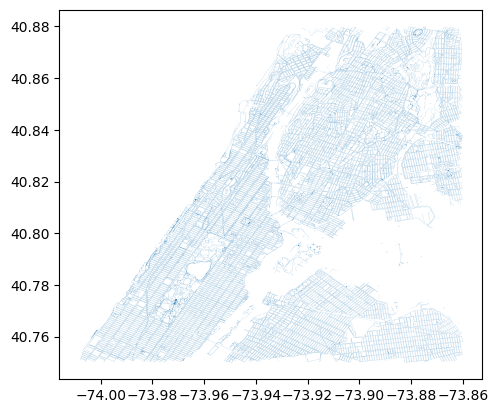

In [23]:
# Convert the_geom to a GeoDataFrame
filtered_sidewalk['geometry'] = filtered_sidewalk['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_sidewalk, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

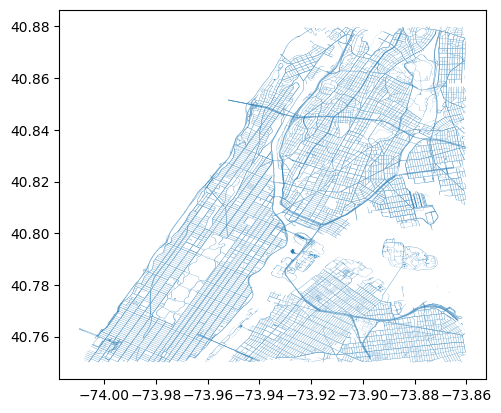

In [24]:
# Convert the_geom to a GeoDataFrame
filtered_roadbed['geometry'] = filtered_roadbed['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_roadbed, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Roadbed:

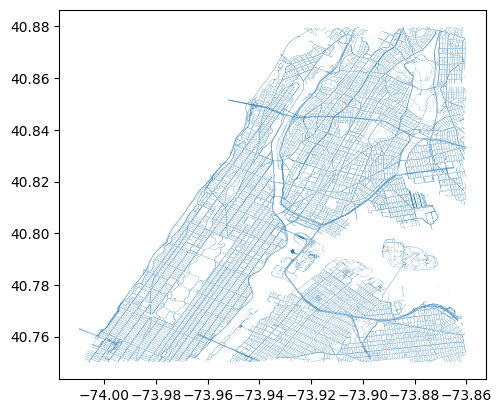

In [25]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_roadbed_1 = filtered_roadbed[filtered_roadbed['SUB_CODE'] == 350000]
# Convert the_geom to a GeoDataFrame
filtered_roadbed_1['geometry'] = filtered_roadbed_1['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_roadbed_1, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Railroads:

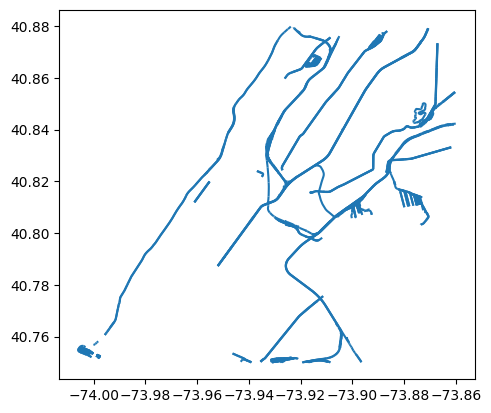

In [26]:
# Convert the_geom to a GeoDataFrame
filtered_railroad['geometry'] = filtered_railroad['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_railroad, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

### Water Locations:

This includes the shoreline and hydrography data:
1. Shoreline (from the shoreline data)
2. Lake/Reservoir: FEAT_CODE = 2600
3. Pond: FEAT_CODE = 2610
4. River: FEAT_CODE = 2620
5. Stream: FEAT_CODE = 2630
6. Wetland/Marsh: FEAT_CODE = 2640
7. Beach/Shoreline: FEAT_CODE = 2650
8. Bay/Ocean: FEAT_CODE = 2660

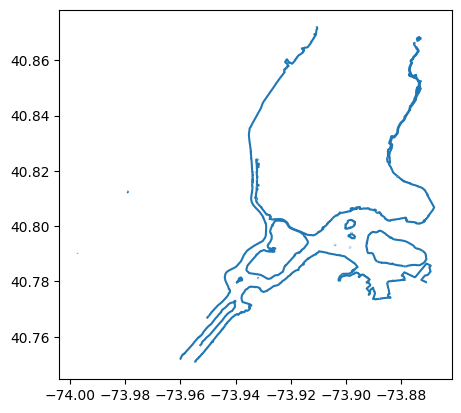

In [27]:
# Convert the_geom to a GeoDataFrame
filtered_shoreline['geometry'] = filtered_shoreline['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_shoreline, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

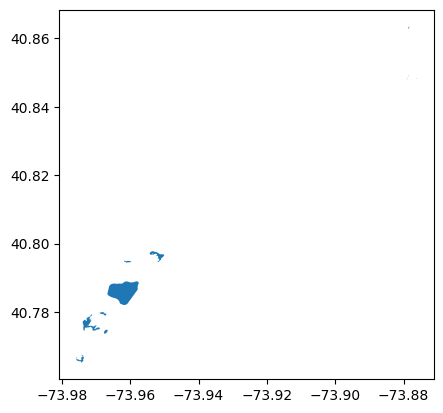

In [28]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_hydrography_lake = filtered_hydrography[filtered_hydrography['FEAT_CODE'] == 2600]
# Convert the_geom to a GeoDataFrame
filtered_hydrography_lake['geometry'] = filtered_hydrography_lake['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_hydrography_lake, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

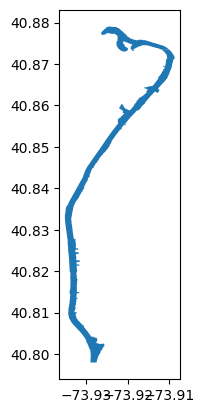

In [29]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_hydrography_river = filtered_hydrography[filtered_hydrography['FEAT_CODE'] == 2620]
# Convert the_geom to a GeoDataFrame
filtered_hydrography_river['geometry'] = filtered_hydrography_river['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_hydrography_river, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

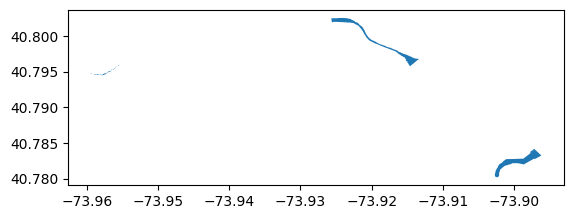

In [30]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_hydrography_stream = filtered_hydrography[filtered_hydrography['FEAT_CODE'] == 2630]
# Convert the_geom to a GeoDataFrame
filtered_hydrography_stream['geometry'] = filtered_hydrography_stream['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_hydrography_stream, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

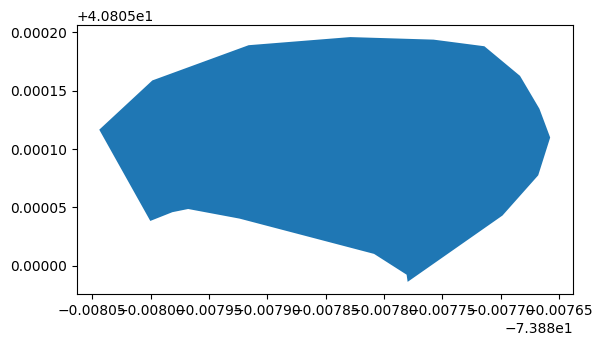

In [31]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_hydrography_beach = filtered_hydrography[filtered_hydrography['FEAT_CODE'] == 2650]
# Convert the_geom to a GeoDataFrame
filtered_hydrography_beach['geometry'] = filtered_hydrography_beach['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_hydrography_beach, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

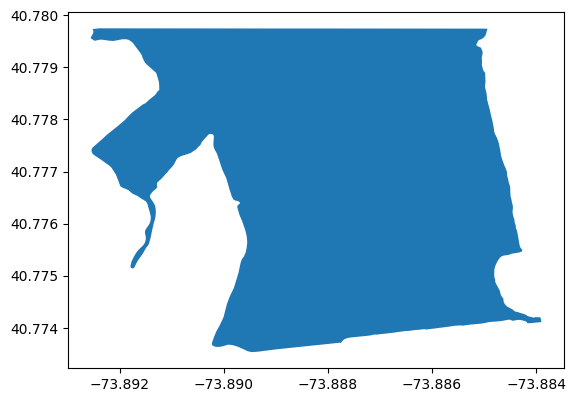

In [32]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_hydrography_ocean = filtered_hydrography[filtered_hydrography['FEAT_CODE'] == 2660]
# Convert the_geom to a GeoDataFrame
filtered_hydrography_ocean['geometry'] = filtered_hydrography_ocean['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_hydrography_ocean, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

### Parking Lots:

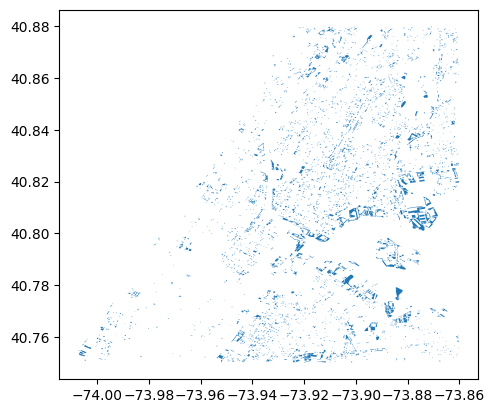

In [33]:
# Convert the_geom to a GeoDataFrame
filtered_parking_lots['geometry'] = filtered_parking_lots['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parking_lots, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

### Parks:

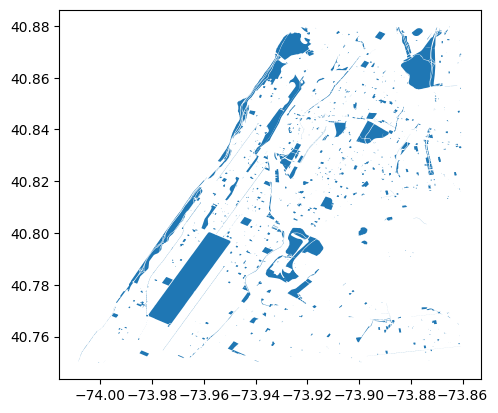

In [34]:
# Convert the_geom to a GeoDataFrame
filtered_parks['geometry'] = filtered_parks['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parks, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

In [35]:
filtered_parks['FEAT_CODE'].value_counts()

FEAT_CODE
4910    1140
4980    1026
4985     667
4900     171
4930      34
4950      33
4960      21
4920      21
4970       1
Name: count, dtype: int64

The types of parks features:
- FEAT_CODE = 4980, Park Boundary
- FEAT_CODE = 4900, Baseball/Softball Field
- FEAT_CODE = 4910, Court
- FEAT_CODE = 4920, Football Field
- FEAT_CODE = 4930, Soccer Field
- FEAT_CODE = 4940, Golf Course
- FEAT_CODE = 4950, Pool
- FEAT_CODE = 4960, Running Track
- FEAT_CODE = 4970, Skating Rink
- FEAT_CODE = 4985, Greenstreets

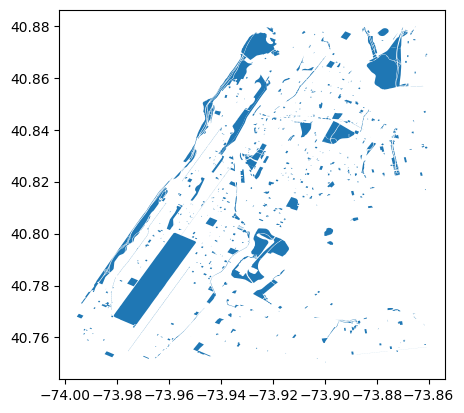

In [36]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_parks_1 = filtered_parks[filtered_parks['FEAT_CODE'] == 4980]
# Convert the_geom to a GeoDataFrame
filtered_parks_1['geometry'] = filtered_parks_1['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parks_1, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Baseball/Softball:

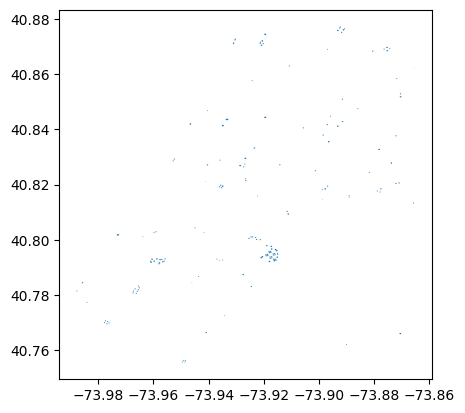

In [37]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_parks_baseball = filtered_parks[filtered_parks['FEAT_CODE'] == 4900]
# Convert the_geom to a GeoDataFrame
filtered_parks_baseball['geometry'] = filtered_parks_baseball['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parks_baseball, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Greenstreets:

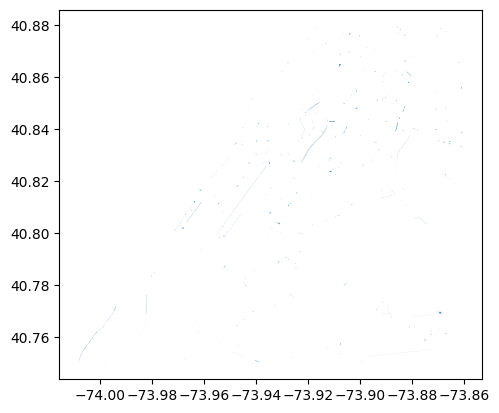

In [38]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_parks_greenstreets = filtered_parks[filtered_parks['FEAT_CODE'] == 4985]
# Convert the_geom to a GeoDataFrame
filtered_parks_greenstreets['geometry'] = filtered_parks_greenstreets['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parks_greenstreets, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

Courts:

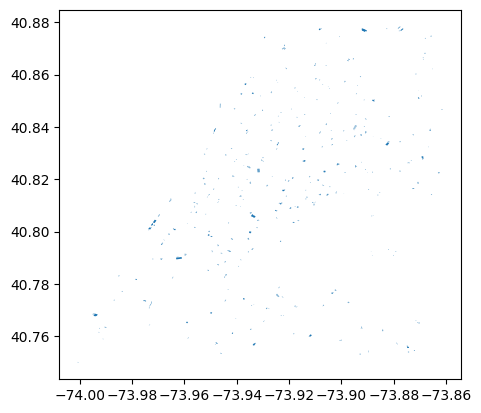

In [39]:
# Filter the data to only include instances where FEAT_CODE is...
filtered_parks_courts = filtered_parks[filtered_parks['FEAT_CODE'] == 4910]
# Convert the_geom to a GeoDataFrame
filtered_parks_courts['geometry'] = filtered_parks_courts['the_geom'].apply(wkt.loads)
gdf_geometry = gpd.GeoDataFrame(filtered_parks_courts, geometry='geometry')

# Plot the GeoDataFrame
gdf_geometry.plot()
plt.show()

### Elevation:

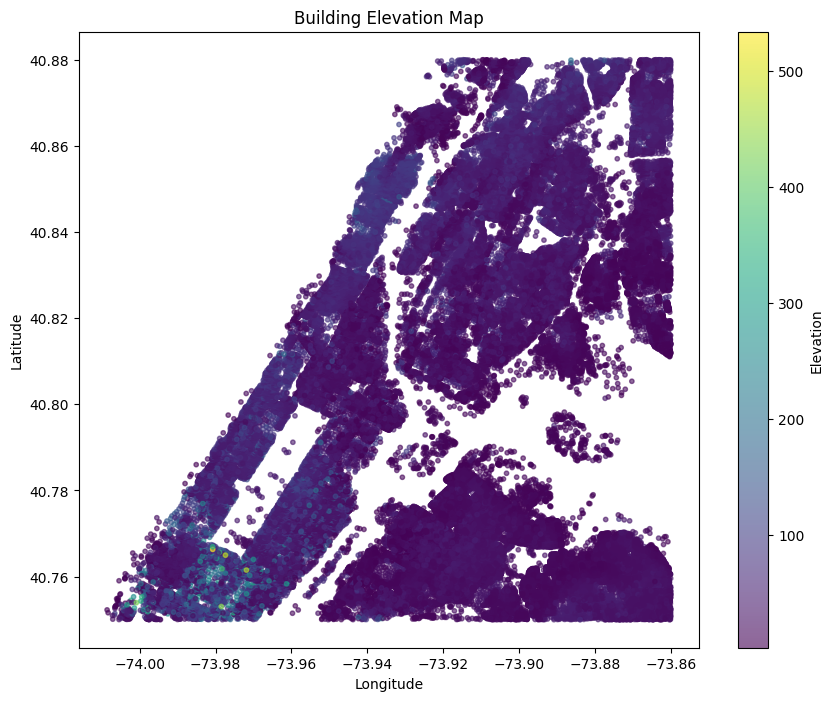

In [40]:
# Filter the data to only include instances where FEAT_CODE is 3020
filtered_elevation_building = filtered_elevation[filtered_elevation['FEAT_CODE'] == 3020]

# Extract the geometry and elevation columns
geometry = filtered_elevation_building['geometry']
elevation_values = filtered_elevation_building['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Elevation Map')
plt.show()

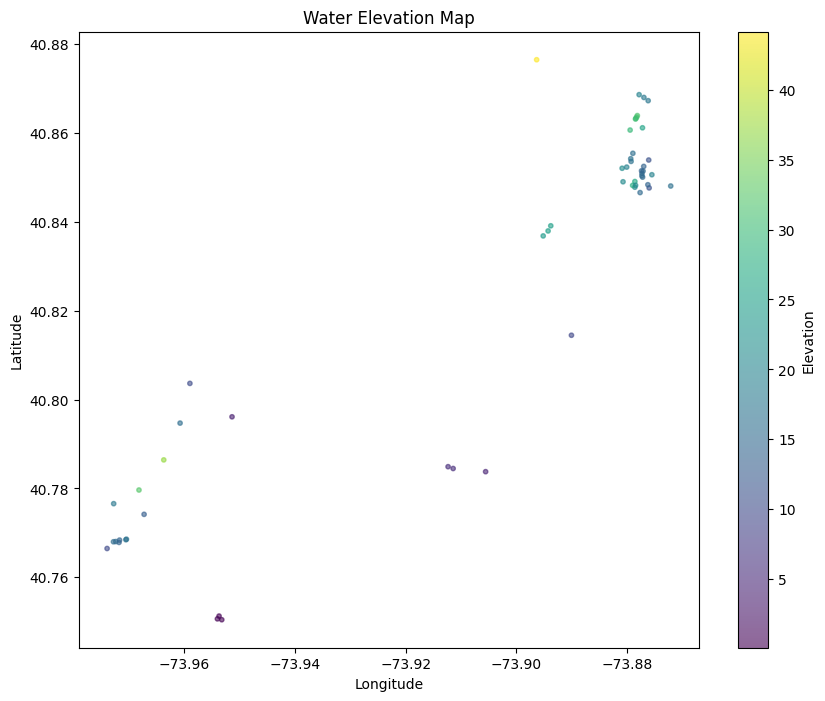

In [41]:
# Filter the data to only include instances where FEAT_CODE is 3020
filtered_elevation_water = filtered_elevation[filtered_elevation['FEAT_CODE'] == 3010]

# Extract the geometry and elevation columns
geometry = filtered_elevation_water['geometry']
elevation_values = filtered_elevation_water['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Water Elevation Map')
plt.show()

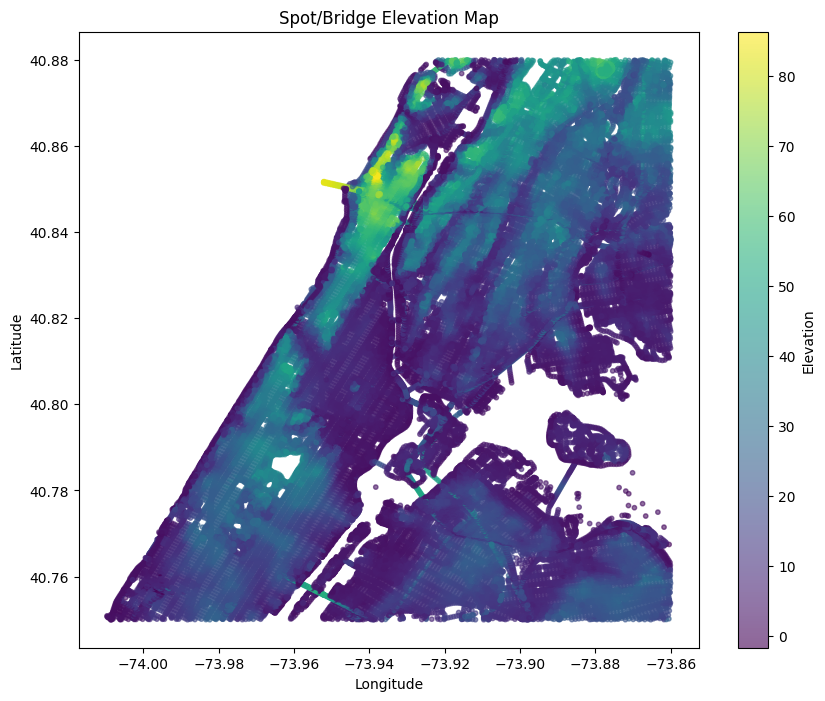

In [42]:
# Filter the data to only include instances where FEAT_CODE is 3000
filtered_elevation_other = filtered_elevation[filtered_elevation['FEAT_CODE'] == 3000]
# Extract the geometry and elevation columns
geometry = filtered_elevation_other['geometry']
elevation_values = filtered_elevation_other['ELEVATION']

# Extract x and y coordinates from the geometry
x_coords = geometry.apply(lambda point: point.x)
y_coords = geometry.apply(lambda point: point.y)

# Create a scatter plot with a color map based on elevation values
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=elevation_values, cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Elevation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spot/Bridge Elevation Map')
plt.show()


# Distance Calculation:

Here I am computing the distance from different areas such as the roadways from shorelines and the elevation of a building from the shoreline or roadways. This will all give certain elements that may later be used in the model potentially. 

### Building Distance from Shoreline:

In [52]:
# Extract the coordinates of the shoreline
shoreline_coords = filtered_shoreline['geometry'].apply(lambda geom: geom.centroid)

# Convert shoreline_coords to a GeoSeries
shoreline_coords_gs = gpd.GeoSeries(shoreline_coords)

# Extract the coordinates of the elevation points
elevation_coords = filtered_elevation_building['geometry']

# Find the closest shoreline point to each building point
closest_shoreline_points = elevation_coords.apply(lambda point: nearest_points(point, shoreline_coords_gs.unary_union)[1])

# Compute the difference in longitude and latitude
diff_lon = elevation_coords.apply(lambda point: point.x) - closest_shoreline_points.apply(lambda point: point.x)
diff_lat = elevation_coords.apply(lambda point: point.y) - closest_shoreline_points.apply(lambda point: point.y)

# Create a DataFrame to store the differences and coordinates
building_shoreline_distance = pd.DataFrame({
    'diff_lon': diff_lon,
    'diff_lat': diff_lat,
    'elevation_lon': elevation_coords.apply(lambda point: point.x),
    'elevation_lat': elevation_coords.apply(lambda point: point.y),
    'shoreline_lon': closest_shoreline_points.apply(lambda point: point.x),
    'shoreline_lat': closest_shoreline_points.apply(lambda point: point.y)
})

# Display the differences
building_shoreline_distance

# Save the data to a CSV file
building_shoreline_distance.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Shoreline_Building_Distance.csv", index=False)

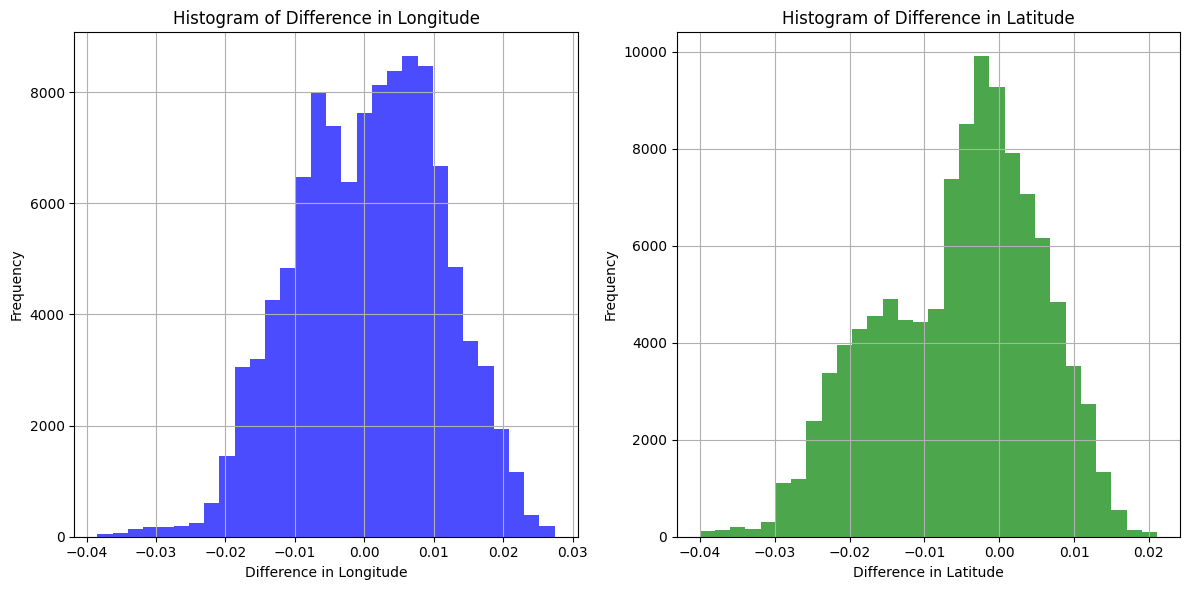

In [44]:
plt.figure(figsize=(12, 6))

# Histogram for difference in longitude
plt.subplot(1, 2, 1)
plt.hist(building_shoreline_distance['diff_lon'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Difference in Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Longitude')
plt.grid(True)

# Histogram for difference in latitude
plt.subplot(1, 2, 2)
plt.hist(building_shoreline_distance['diff_lat'], bins=30, alpha=0.7, color='green')
plt.xlabel('Difference in Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()

### Building Distance from Parks:

In [53]:
# Extract the coordinates of the parks
park_coords = filtered_parks['geometry'].apply(lambda geom: geom.centroid)

# Convert park_coords to a GeoSeries
park_coords_gs = gpd.GeoSeries(park_coords)

# Extract the coordinates of the elevation points
elevation_coords = filtered_elevation_building['geometry']

# Find the closest park point to each building point
closest_park_points = elevation_coords.apply(lambda point: nearest_points(point, park_coords_gs.unary_union)[1])

# Compute the difference in longitude and latitude
diff_lon = elevation_coords.apply(lambda point: point.x) - closest_park_points.apply(lambda point: point.x)
diff_lat = elevation_coords.apply(lambda point: point.y) - closest_park_points.apply(lambda point: point.y)

# Create a DataFrame to store the differences and coordinates
building_parks_distance = pd.DataFrame({
    'diff_lon': diff_lon,
    'diff_lat': diff_lat,
    'elevation_lon': elevation_coords.apply(lambda point: point.x),
    'elevation_lat': elevation_coords.apply(lambda point: point.y),
    'park_lon': closest_park_points.apply(lambda point: point.x),
    'park_lat': closest_park_points.apply(lambda point: point.y)
})

# Display the differences
building_parks_distance

# Save the data to a CSV file
building_parks_distance.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Parks_Building_Distance.csv", index=False)

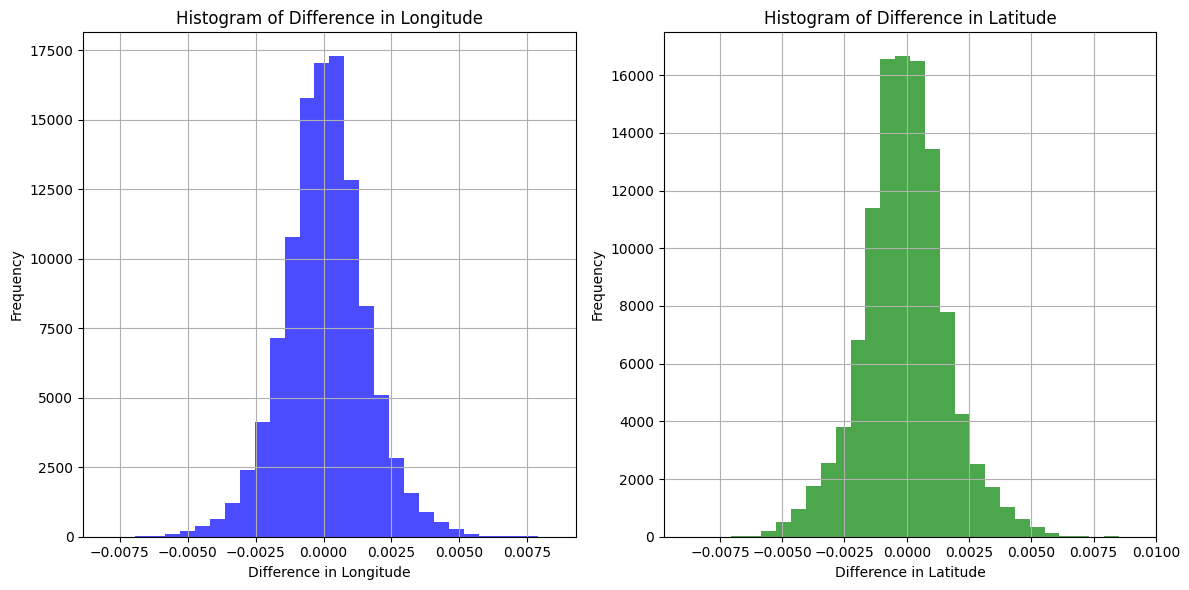

In [46]:
plt.figure(figsize=(12, 6))

# Histogram for difference in longitude
plt.subplot(1, 2, 1)
plt.hist(building_parks_distance['diff_lon'], bins=30, alpha=0.7, color='blue')
plt.xlabel('Difference in Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Longitude')
plt.grid(True)

# Histogram for difference in latitude
plt.subplot(1, 2, 2)
plt.hist(building_parks_distance['diff_lat'], bins=30, alpha=0.7, color='green')
plt.xlabel('Difference in Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()

Interestingly, we see a trend of normal distribution for the distance for both longitude and latitude of the buildings from shoreline and other regions. This is expected given the large amount of numbers and layout of the city typically. 

# Clustering:

Look into locations that have a large amount of roadbed instances and interpret that.

In [92]:
filtered_roadbed_1

the_geom    SOURCE_ID  \
19      MULTIPOLYGON (((-73.94433790035632 40.75259328...  10350001565   
20      MULTIPOLYGON (((-73.94433790035632 40.75259328...  10350001565   
21      MULTIPOLYGON (((-73.94491704607788 40.75252184...  10350001565   
25      MULTIPOLYGON (((-73.88982310732054 40.83403088...  14350001239   
27      MULTIPOLYGON (((-73.92703337052437 40.82572397...  14350002804   
...                                                   ...          ...   
104941  MULTIPOLYGON (((-73.93187917360252 40.83096897...  14350004450   
104942  MULTIPOLYGON (((-73.9284532592959 40.840247622...  14350004450   
104944  MULTIPOLYGON (((-73.92731694607149 40.84308629...  13350003629   
104945  MULTIPOLYGON (((-73.92891508214844 40.84180887...  14350004428   
104949  MULTIPOLYGON (((-73.9288215459468 40.840221125...  13350004109   

        SUB_CODE  FEAT_CODE     STATUS    SHAPE_Leng     SHAPE_Area  \
19        350000       3500    Updated    101.342286     126.443869   
20        350000       3500    Updated    194.497485    1210.823939   
21        350000       3500    Updated    202.836215    1648.111708   
25        350000       3500  Unchanged   1264.544446    9007.460097   
27        350000       3500  Unchanged    104.214459     368.193989   
...          ...        ...        ...           ...            ...   
104941    350000       3500  Unchanged   2760.735291   30093.141944   
104942    350000       3500  Unchanged   6773.538970   97905.709524   
104944    350000       3500  Unchanged   1594.344601   16663.083869   
104945    350000       3500  Unchanged  14089.393618  142134.092431   
104949    350000       3500    Updated  13686.140322  152041.711439   

                                                 geometry  cluster  
19      MULTIPOLYGON (((-73.94433790035632 40.75259328...        1  
20      MULTIPOLYGON (((-73.94433790035632 40.75259328...        1  
21      MULTIPOLYGON (((-73.94491704607788 40.75252184...        1  
25      MULTIPOLYGON (((-73.88982310732054 40.83403088...        1  
27      MULTIPOLYGON (((-73.92703337052437 40.82572397...        1  
...                                                   ...      ...  
104941  MULTIPOLYGON (((-73.93187917360252 40.83096897...        0  
104942  MULTIPOLYGON (((-73.9284532592959 40.840247622...        3  
104944  MULTIPOLYGON (((-73.92731694607149 40.84308629...        1  
104945  MULTIPOLYGON (((-73.92891508214844 40.84180887...        3  
104949  MULTIPOLYGON (((-73.9288215459468 40.840221125...        3  

[13477 rows x 9 columns]

In [93]:
from sklearn.cluster import KMeans

# Extract the coordinates of the roadbed
roadbed_coords = filtered_roadbed_1['geometry'].apply(lambda geom: geom.centroid)
roadbed_coords_x = roadbed_coords.apply(lambda point: point.x)
roadbed_coords_y = roadbed_coords.apply(lambda point: point.y)

# Create a DataFrame with the coordinates
roadbed_coords_df = pd.DataFrame({'x': roadbed_coords_x, 'y': roadbed_coords_y})

# Extract the SHAPE_Area and SHAPE_Leng columns
roadbed_features = filtered_roadbed_1[['SHAPE_Area', 'SHAPE_Leng']]

# Determine the number of clusters (you can adjust the number of clusters as needed)
num_clusters = 4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(roadbed_features)
roadbed_coords_df['cluster'] = kmeans.labels_

# Add SHAPE_Area and SHAPE_Leng to the DataFrame
roadbed_coords_df['SHAPE_Area'] = filtered_roadbed_1['SHAPE_Area'].values
roadbed_coords_df['SHAPE_Leng'] = filtered_roadbed_1['SHAPE_Leng'].values

# Display the DataFrame with clusters
roadbed_coords_df

# Save to a CSV
roadbed_coords_df.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Roadbed_Coord_Clusters.csv", index=False)

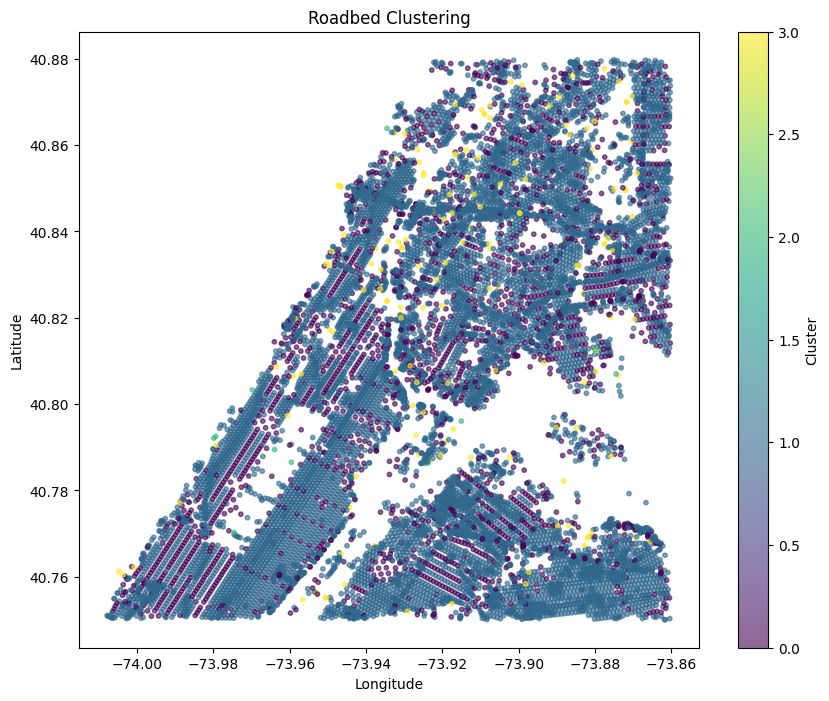

In [94]:
# Plot the roadbed_coords_df
plt.figure(figsize=(10, 8))
plt.scatter(roadbed_coords_df['x'], roadbed_coords_df['y'], c=roadbed_coords_df['cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Roadbed Clustering')
plt.show()

Now group the values to the nearest elevation points.

In [95]:
from shapely.geometry import Point

# Convert the coordinates of all_elevation_nyc to a GeoSeries
elevation_coords = gpd.GeoSeries([Point(x, y) for x, y in zip(all_elevation_nyc['Longitude'], all_elevation_nyc['Latitude'])])

# Convert the roadbed coordinates to a GeoSeries
roadbed_coords = gpd.GeoSeries([Point(x, y) for x, y in zip(roadbed_coords_df['x'], roadbed_coords_df['y'])])

# Find the nearest elevation point for each roadbed point
nearest_elevation_points = roadbed_coords.apply(lambda point: nearest_points(point, elevation_coords.unary_union)[1])

# Check if the nearest point is the same as the roadbed point
exact_or_nearest_points = [point if point.equals(nearest_point) else nearest_point for point, nearest_point in zip(roadbed_coords, nearest_elevation_points)]

# Extract the longitude and latitude of the exact or nearest elevation points
exact_or_nearest_lon = [point.x for point in exact_or_nearest_points]
exact_or_nearest_lat = [point.y for point in exact_or_nearest_points]

# Add the exact or nearest elevation coordinates to the roadbed_coords_df
roadbed_coords_df['Long'] = exact_or_nearest_lon
roadbed_coords_df['Lat'] = exact_or_nearest_lat

# Display the updated DataFrame
roadbed_coords_df

x          y  cluster     SHAPE_Area    SHAPE_Leng       Long  \
19     -73.944420  40.752625        1     126.443869    101.342286 -73.957685   
20     -73.944312  40.752625        1    1210.823939    194.497485 -73.957685   
21     -73.945032  40.752478        1    1648.111708    202.836215 -73.957685   
25     -73.890296  40.833290        1    9007.460097   1264.544446 -73.896485   
27     -73.927067  40.825684        1     368.193989    104.214459 -73.927190   
...           ...        ...      ...            ...           ...        ...   
104941 -73.931128  40.833062        0   30093.141944   2760.735291 -73.931012   
104942 -73.929553  40.838142        3   97905.709524   6773.538970 -73.928068   
104944 -73.927616  40.843896        1   16663.083869   1594.344601 -73.925207   
104945 -73.931480  40.837521        3  142134.092431  14089.393618 -73.930258   
104949 -73.930594  40.836081        3  152041.711439  13686.140322 -73.930258   

              Lat  
19      40.761000  
20      40.761000  
21      40.761000  
25      40.833570  
27      40.825438  
...           ...  
104941  40.833212  
104942  40.838583  
104944  40.842202  
104945  40.834563  
104949  40.834563  

[13477 rows x 7 columns]

In [96]:
# Calculate the average SHAPE_Leng and SHAPE_Area for each cluster
average_values = roadbed_coords_df.groupby('cluster')[['SHAPE_Leng', 'SHAPE_Area']].mean()

# Display the average values
print(average_values)

           SHAPE_Leng     SHAPE_Area
cluster                             
0         2082.885159   37455.907724
1          680.037281    9484.386073
2        31692.082118  591131.313957
3         8252.617826  156340.268454


Cluster the elevation differences:

In [63]:
all_elevation_nyc

Unnamed: 0  Longitude   Latitude  Building Granular  \
0               0 -73.909167  40.813107              99.10   
1               1 -73.909187  40.813045              99.10   
2               2 -73.909215  40.812978              99.10   
3               3 -73.909242  40.812908              62.21   
4               4 -73.909257  40.812845              62.21   
...           ...        ...        ...                ...   
11224       11224 -73.957050  40.790333             111.46   
11225       11225 -73.957063  40.790308             111.46   
11226       11226 -73.957093  40.790270             111.46   
11227       11227 -73.957112  40.790253             111.46   
11228       11228 -73.957128  40.790237             111.46   

       Building Proximity  Natural Granular  Natural Proximity  \
0               66.424444            34.394          34.799111   
1               66.424444            34.394          34.799111   
2               66.424444            34.394          34.799111   
3               66.424444            34.318          34.799111   
4               66.424444            34.318          34.799111   
...                   ...               ...                ...   
11224          184.690000            65.749          65.588000   
11225          184.690000            65.749          65.588000   
11226          184.690000            65.749          65.588000   
11227          184.690000            65.749          65.588000   
11228          184.690000            65.749          65.588000   

       Building Height Only Granular  Building Height Only Proximity  
0                             64.706                       31.625333  
1                             64.706                       31.625333  
2                             64.706                       31.625333  
3                             27.892                       31.625333  
4                             27.892                       31.625333  
...                              ...                             ...  
11224                         45.711                      119.102000  
11225                         45.711                      119.102000  
11226                         45.711                      119.102000  
11227                         45.711                      119.102000  
11228                         45.711                      119.102000  

[11229 rows x 9 columns]

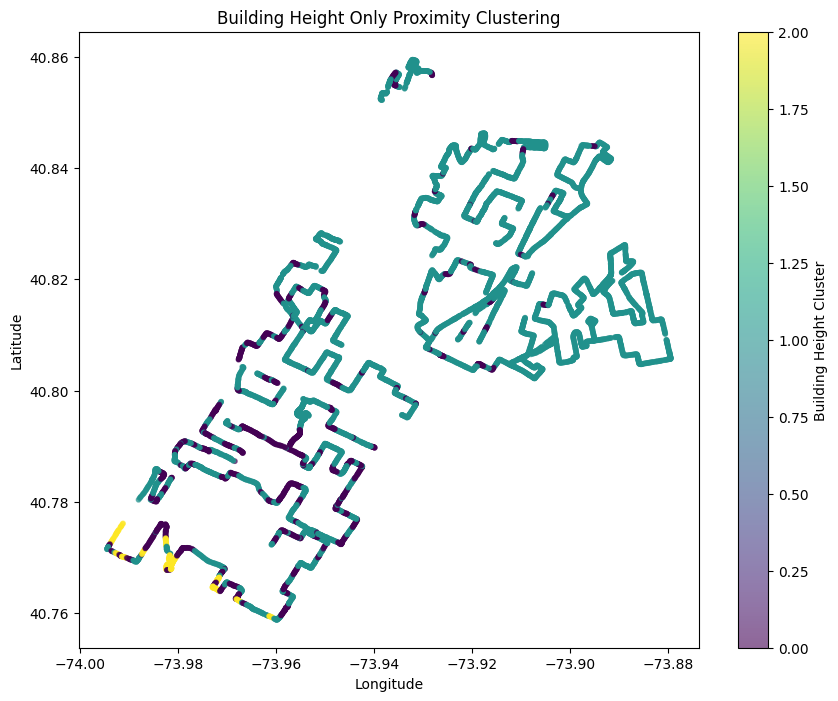

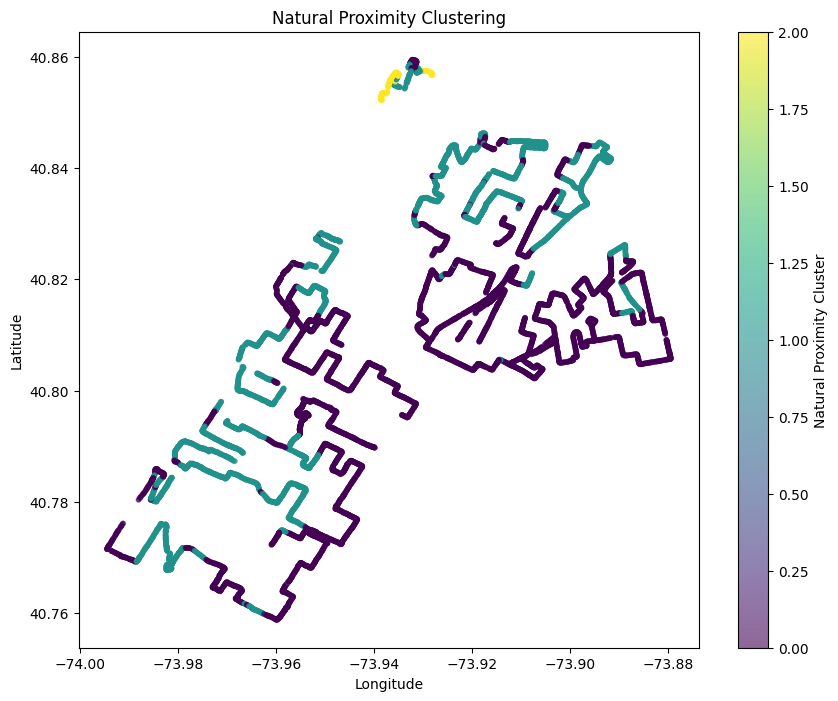

In [77]:
from sklearn.cluster import KMeans

# Extract the relevant columns for clustering
building_height_proximity = all_elevation_nyc[['Building Height Only Proximity']]
natural_proximity = all_elevation_nyc[['Natural Proximity']]

# Determine the number of clusters (you can adjust the number of clusters as needed)
num_clusters = 3

# Perform KMeans clustering for Building Height Only Proximity
kmeans_building_height = KMeans(n_clusters=num_clusters, random_state=0).fit(building_height_proximity)
all_elevation_nyc['building_height_cluster'] = kmeans_building_height.labels_

# Perform KMeans clustering for Natural Proximity
kmeans_natural_proximity = KMeans(n_clusters=num_clusters, random_state=0).fit(natural_proximity)
all_elevation_nyc['natural_proximity_cluster'] = kmeans_natural_proximity.labels_

# Extract the coordinates
x_coords = all_elevation_nyc['Longitude']
y_coords = all_elevation_nyc['Latitude']

# Plot the clusters for Building Height Only Proximity
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=all_elevation_nyc['building_height_cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Building Height Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Building Height Only Proximity Clustering')
plt.show()

# Plot the clusters for Natural Proximity
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=all_elevation_nyc['natural_proximity_cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Natural Proximity Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Natural Proximity Clustering')
plt.show()

In [79]:
# Create a DataFrame for the clusters
clusters_df_elevation = pd.DataFrame({
    'Longitude': all_elevation_nyc['Longitude'],
    'Latitude': all_elevation_nyc['Latitude'],
    'Building Height Only Proximity': all_elevation_nyc['Building Height Only Proximity'],
    'Natural Proximity': all_elevation_nyc['Natural Proximity'],
    'Building Height Cluster': all_elevation_nyc['building_height_cluster'],
    'Natural Proximity Cluster': all_elevation_nyc['natural_proximity_cluster']
})

# Save Dataset
clusters_df_elevation.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Elevation_Clusters.csv", index=False)

In [91]:
# Calculate the average building height for each cluster
avg_building_height = clusters_df_elevation.groupby('Building Height Cluster')['Building Height Only Proximity'].mean()

# Calculate the average natural proximity for each cluster
avg_natural_proximity = clusters_df_elevation.groupby('Natural Proximity Cluster')['Natural Proximity'].mean()

print("Average Building Height in Each Cluster:")
print(avg_building_height)

print("\nAverage Natural Proximity in Each Cluster:")
print(avg_natural_proximity)

Average Building Height in Each Cluster:
Building Height Cluster
0    134.421404
1     49.381351
2    399.594260
Name: Building Height Only Proximity, dtype: float64

Average Natural Proximity in Each Cluster:
Natural Proximity Cluster
0     28.230839
1     88.135055
2    215.765092
Name: Natural Proximity, dtype: float64


Look at the clustering of the shoreline data:

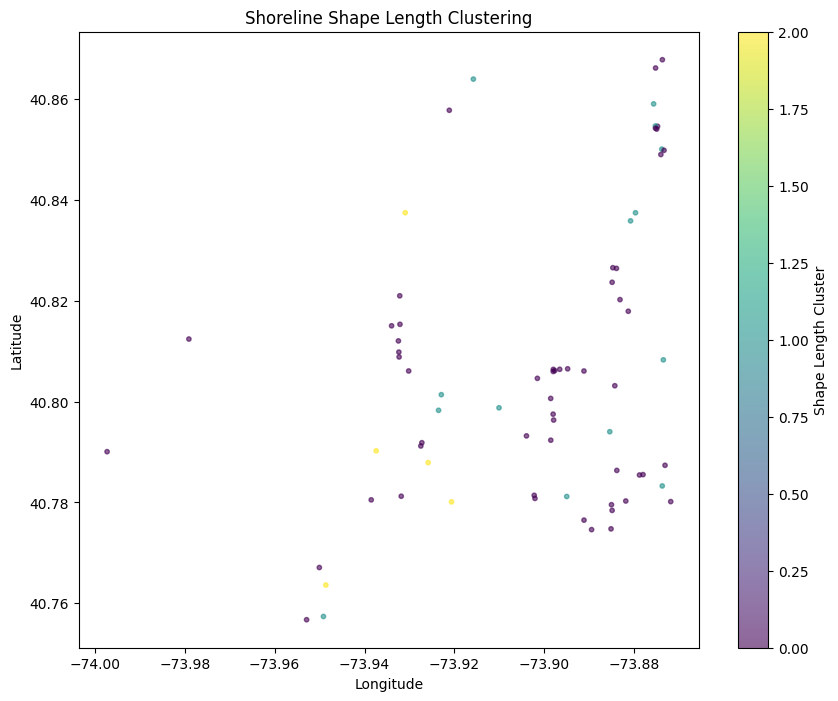

In [81]:
from sklearn.cluster import KMeans

# Extract the relevant column for clustering
shoreline_shape_leng = filtered_shoreline[['SHAPE_Leng']]

# Determine the number of clusters (you can adjust the number of clusters as needed)
num_clusters = 3

# Perform KMeans clustering
kmeans_shoreline = KMeans(n_clusters=num_clusters, random_state=0).fit(shoreline_shape_leng)
filtered_shoreline['shape_leng_cluster'] = kmeans_shoreline.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(filtered_shoreline['geometry'].apply(lambda geom: geom.centroid.x),
            filtered_shoreline['geometry'].apply(lambda geom: geom.centroid.y),
            c=filtered_shoreline['shape_leng_cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Shape Length Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Shoreline Shape Length Clustering')
plt.show()

In [83]:
# Extract the coordinates of the filtered_shoreline
shoreline_coords = filtered_shoreline['geometry'].apply(lambda geom: geom.centroid)
shoreline_coords_x = shoreline_coords.apply(lambda point: point.x)
shoreline_coords_y = shoreline_coords.apply(lambda point: point.y)

# Create a DataFrame with the coordinates and clusters
shoreline_clusters_df = pd.DataFrame({
    'Longitude': shoreline_coords_x,
    'Latitude': shoreline_coords_y,
    'Cluster': filtered_shoreline['shape_leng_cluster']
})

# Display the DataFrame
shoreline_clusters_df

# Save the DataFrame to a CSV file
shoreline_clusters_df.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Shoreline_Clusters.csv", index=False)

Now cluster the park areas:

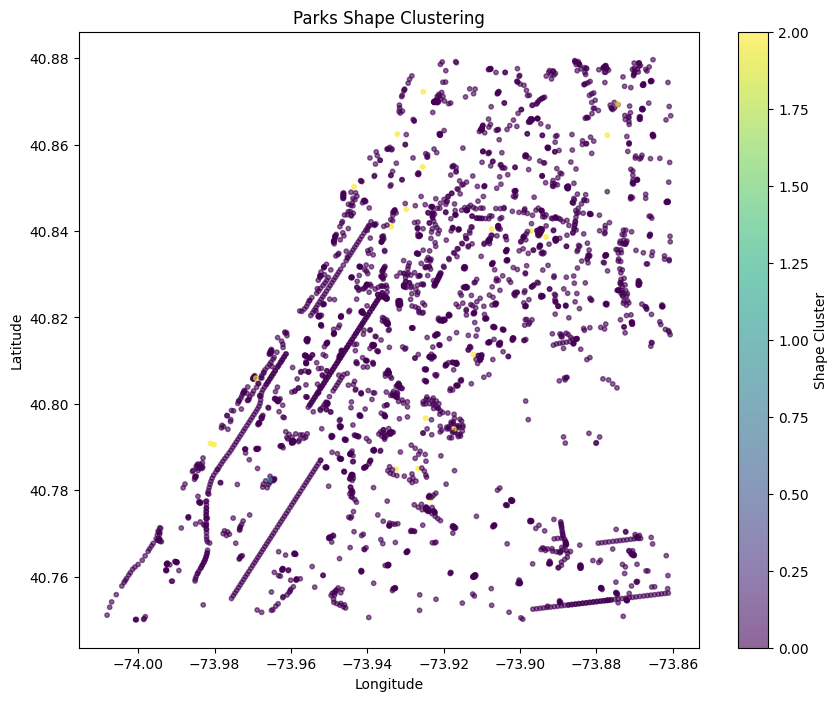

In [87]:
from sklearn.cluster import KMeans

# Extract the relevant columns for clustering
parks_features = filtered_parks[['SHAPE_Leng', 'SHAPE_Area']]

# Determine the number of clusters (you can adjust the number of clusters as needed)
num_clusters = 3

# Perform KMeans clustering
kmeans_parks = KMeans(n_clusters=num_clusters, random_state=0).fit(parks_features)
filtered_parks['shape_cluster'] = kmeans_parks.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(filtered_parks['geometry'].apply(lambda geom: geom.centroid.x),
            filtered_parks['geometry'].apply(lambda geom: geom.centroid.y),
            c=filtered_parks['shape_cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Shape Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Parks Shape Clustering')
plt.show()

In [89]:
# Extract the coordinates of the filtered_shoreline
parks_coords = filtered_parks['geometry'].apply(lambda geom: geom.centroid)
parks_coords_x = parks_coords.apply(lambda point: point.x)
parks_coords_y = parks_coords.apply(lambda point: point.y)

# Create a DataFrame with the coordinates and clusters
parks_clusters_df = pd.DataFrame({
    'Longitude': parks_coords_x,
    'Latitude': parks_coords_y,
    'Cluster': filtered_parks['shape_cluster']
})

# Display the DataFrame
parks_clusters_df

# Save the DataFrame to a CSV file
parks_clusters_df.to_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Planimetric Database\\Park_Clusters.csv", index=False)

# Conclusion:

It is under debate whether the distance calculations will be helpful for the model. However, we can use a lot from understanding the different locations of these aspects of the city. Hopefully, the clusters could help us understand different areas of the city in terms of elevation, roadbed, shoreline, and more. 